In [ ]:
!pip install pydrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
import requests, json
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import data_table
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()
sns.set_style('whitegrid')
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 100)

In [ ]:
#get data from bootstrap-static endpoint
data = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/').json()

# show the top level fields
pprint(data, indent=2, depth=1, compact=True)

{ 'element_stats': [...],
  'element_types': [...],
  'elements': [...],
  'events': [...],
  'game_settings': {...},
  'phases': [...],
  'teams': [...],
  'total_players': 11447257}


In [ ]:
player_data_json = data['elements']

# show data for first player
pprint(player_data_json[0])

{'assists': 8,
 'bonus': 15,
 'bps': 634,
 'chance_of_playing_next_round': 100,
 'chance_of_playing_this_round': 100,
 'clean_sheets': 13,
 'clean_sheets_per_90': 0.39,
 'code': 84450,
 'corners_and_indirect_freekicks_order': None,
 'corners_and_indirect_freekicks_text': '',
 'cost_change_event': 0,
 'cost_change_event_fall': 0,
 'cost_change_start': -2,
 'cost_change_start_fall': 2,
 'creativity': '675.5',
 'creativity_rank': 35,
 'creativity_rank_type': 28,
 'direct_freekicks_order': 2,
 'direct_freekicks_text': '',
 'dreamteam_count': 2,
 'element_type': 3,
 'ep_next': '5.3',
 'ep_this': '15.5',
 'event_points': 15,
 'expected_assists': '3.89',
 'expected_assists_per_90': 0.12,
 'expected_goal_involvements': '8.54',
 'expected_goal_involvements_per_90': 0.26,
 'expected_goals': '4.65',
 'expected_goals_conceded': '36.52',
 'expected_goals_conceded_per_90': 1.1,
 'expected_goals_per_90': 0.14,
 'first_name': 'Granit',
 'form': '15.0',
 'form_rank': 3,
 'form_rank_type': 1,
 'goals_co

In [ ]:
#create players dataframe, loading json into a dataframe
player_data = pd.json_normalize(player_data_json)

#player_data.columns

### Extracting Players Data
As there were plenty of features in the dataset(player_data), I have chosen to clean and consider few features that I think will be of use for the rest of the exercise.

In [ ]:
#dropping some features and concatenating first & second name to create full name

to_drop = ['chance_of_playing_this_round','chance_of_playing_next_round','code','cost_change_event','cost_change_event_fall','cost_change_start','cost_change_start_fall','dreamteam_count','ep_this','event_points','form','in_dreamteam','news','photo','special','squad_number','status','transfers_in','transfers_in_event','transfers_out','transfers_out_event','value_form','value_season','news_added']
player_data.drop(to_drop, axis=1, inplace = True)
player_data['full_name'] = player_data.first_name + " " + player_data.second_name

In [ ]:
player_data.head(5)

,element_type,ep_next,first_name,id,now_cost,points_per_game,second_name,selected_by_percent,team,team_code,total_points,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,full_name
0,3,5.3,Granit,3,48,4.1,Xhaka,2.7,1,3,153,Xhaka,2992,7,8,13,35,0,0,0,4,0,0,15,634,715.0,675.5,556.0,194.8,36,4.65,3.89,8.54,36.52,44,19,35,28,54,33,34,23,NaN,,2.0,,NaN,,0.14,0.0,0.12,0.26,1.10,1.05,265,157,3,1,47,23,118,41,1.08,0.39,Granit Xhaka
1,3,0.0,Mohamed,4,41,1.2,Elneny,0.6,1,3,6,Elneny,111,0,0,0,2,0,0,0,0,0,0,0,27,4.6,5.4,0.0,1.1,1,0.00,0.04,0.04,1.29,510,230,462,222,596,236,510,230,NaN,,NaN,,NaN,,0.00,0.0,0.03,0.03,1.05,1.62,634,335,400,145,457,201,249,81,0.81,0.00,Mohamed Elneny
2,2,0.7,Rob,5,42,1.5,Holding,0.2,1,3,21,Holding,562,1,0,0,13,0,0,0,0,0,0,0,120,152.0,10.3,54.0,21.6,6,0.32,0.15,0.47,11.14,345,140,450,160,346,122,400,146,NaN,,NaN,,NaN,,0.05,0.0,0.02,0.07,1.78,2.08,598,160,417,163,405,144,377,143,0.96,0.00,Rob Holding
3,3,1.5,Thomas,6,47,2.6,Partey,0.4,1,3,86,Partey,2480,3,0,11,28,0,0,0,5,0,0,6,468,526.6,444.1,242.0,121.5,28,2.59,2.17,4.76,32.27,108,46,71,60,154,91,100,68,NaN,,NaN,,NaN,,0.09,0.0,0.08,0.17,1.17,1.02,311,186,74,35,210,80,284,95,1.02,0.40,Thomas Partey
4,3,7.7,Martin,7,69,5.7,Ødegaard,33.3,1,3,212,Ødegaard,3132,15,8,13,38,0,0,0,4,0,0,30,813,971.8,1140.3,934.0,304.9,37,9.75,8.02,17.77,37.94,10,4,7,5,19,9,6,4,3.0,,1.0,,NaN,,0.28,0.0,0.23,0.51,1.09,1.09,44,22,86,44,7,3,5,3,1.06,0.37,Martin Ødegaard


In [ ]:
player_data['position'] = player_data.element_type.map({x['id']:x['singular_name_short'] for x in data['element_types']})
player_data = player_data.loc[:,['full_name','first_name','second_name', 'element_type','position','id','team', 'team_code', 'web_name',
                     'saves','penalties_saved','clean_sheets','goals_conceded',
                     'bonus', 'bps','creativity','ep_next','influence', 'threat','ict_index','ict_index_rank_type',
                     'goals_scored','assists','minutes', 'own_goals',
                     'yellow_cards', 'red_cards','penalties_missed',
                     'selected_by_percent', 'now_cost','points_per_game','total_points']]
player_data['team'] = player_data.team.map({x['id']:x['name'] for x in data['teams']})

In [ ]:
display(player_data[436:470])

,full_name,first_name,second_name,element_type,position,id,team,team_code,web_name,saves,penalties_saved,clean_sheets,goals_conceded,bonus,bps,creativity,ep_next,influence,threat,ict_index,ict_index_rank_type,goals_scored,assists,minutes,own_goals,yellow_cards,red_cards,penalties_missed,selected_by_percent,now_cost,points_per_game,total_points
436,James Milner,James,Milner,3,MID,274,Liverpool,14,Milner,0,0,3,12,0,187,222.7,1.8,179.6,93.0,49.5,130,0,1,889,0,2,0,0,0.6,44,1.4,42
437,Jordan Henderson,Jordan,Henderson,3,MID,275,Liverpool,14,Henderson,0,0,8,30,0,401,525.8,3.0,315.2,185.0,103.0,81,0,3,2060,0,2,0,0,0.5,53,2.0,69
438,Joel Matip,Joel,Matip,2,DEF,276,Liverpool,14,Matip,0,0,3,20,4,216,61.9,1.0,232.8,102.0,39.6,113,1,0,1091,1,3,0,0,0.9,59,2.6,36
439,Thiago Alcántara do Nascimento,Thiago,Alcántara do Nascimento,3,MID,277,Liverpool,14,Thiago,0,0,2,23,0,194,265.8,0.0,244.4,86.0,59.8,117,0,0,1252,0,2,0,0,0.6,51,1.7,30
440,Alex Oxlade-Chamberlain,Alex,Oxlade-Chamberlain,3,MID,278,Liverpool,14,Chamberlain,0,0,0,7,2,57,66.3,1.0,72.4,84.0,22.3,177,1,0,332,0,0,0,0,0.0,49,2.2,20
441,Roberto Firmino,Roberto,Firmino,4,FWD,279,Liverpool,14,Firmino,0,0,4,17,12,447,310.2,2.4,577.6,813.0,170.2,12,11,4,1202,0,0,0,0,3.2,80,4.2,104
442,Virgil van Dijk,Virgil,van Dijk,2,DEF,280,Liverpool,14,Van Dijk,0,0,11,36,13,636,121.0,6.2,743.2,389.0,125.4,12,3,1,2835,0,3,0,0,12.4,66,4.0,127
443,Alisson Ramses Becker,Alisson,Ramses Becker,1,GKP,281,Liverpool,14,Alisson,107,1,14,43,15,824,10.1,6.6,966.4,0.0,97.6,4,0,1,3330,0,1,0,0,16.8,55,4.4,162
444,Fabio Henrique Tavares,Fabio Henrique,Tavares,3,MID,282,Liverpool,14,Fabinho,0,0,11,34,0,394,316.4,3.2,400.2,109.0,82.5,97,0,2,2666,0,11,0,0,0.8,52,1.9,70
445,Mohamed Salah,Mohamed,Salah,3,MID,283,Liverpool,14,Salah,0,0,13,45,23,651,899.2,10.0,1067.4,1688.0,365.6,1,19,13,3290,0,2,0,2,37.2,131,6.3,239


Correlation of features to total points scored

In [ ]:
display(player_data.corr()['total_points'])

<ipython-input-11-8974baae8be9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(player_data.corr()['total_points'])


element_type           0.086925
id                    -0.326381
team_code             -0.013819
saves                  0.261556
penalties_saved        0.201108
clean_sheets           0.914617
goals_conceded         0.816626
bonus                  0.872953
bps                    0.950120
ict_index_rank_type   -0.684259
goals_scored           0.707155
assists                0.737441
minutes                0.922282
own_goals              0.203002
yellow_cards           0.606883
red_cards              0.090497
penalties_missed       0.247341
now_cost               0.582539
total_points           1.000000
Name: total_points, dtype: float64

Mean of total points in relation to the position

,total_points
position,
DEF,37.950382
FWD,47.634409
GKP,32.705882
MID,43.109467


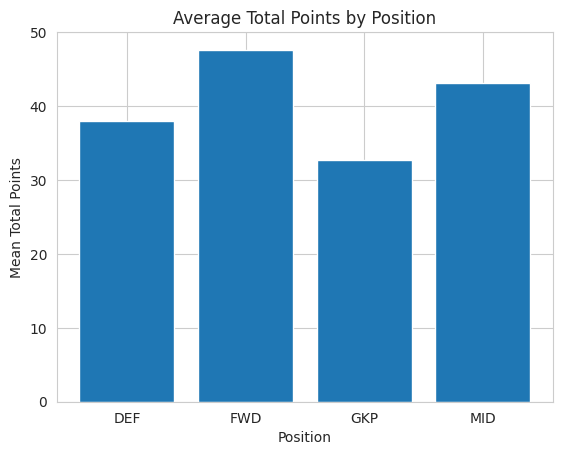

In [ ]:
# Data
position_mean_points = player_data.pivot_table(index='position', values='total_points', aggfunc='mean')

display(position_mean_points)

# Create bar plot
plt.bar(position_mean_points.index, position_mean_points['total_points'])

# Set plot title and labels
plt.title('Average Total Points by Position')
plt.xlabel('Position')
plt.ylabel('Mean Total Points')

# Show the plot
plt.show()

Median of total points in relation to the position

,total_points
position,
DEF,29
FWD,30
GKP,0
MID,23


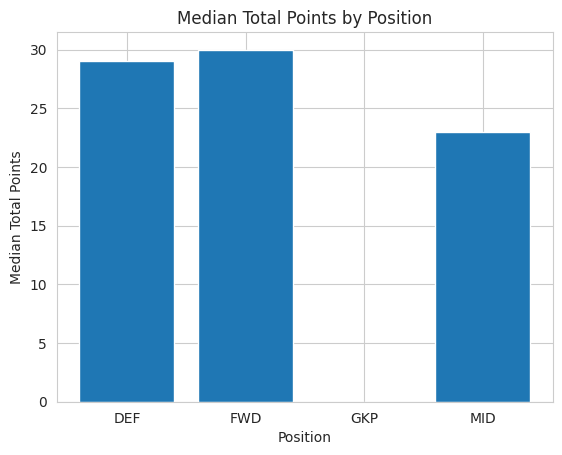

In [ ]:
# Data
position_median_points = player_data.pivot_table(index='position', values='total_points', aggfunc=np.median)

display(position_median_points)

# Create bar plot
plt.bar(position_median_points.index, position_median_points['total_points'])

# Set plot title and labels
plt.title('Median Total Points by Position')
plt.xlabel('Position')
plt.ylabel('Median Total Points')

# Show the plot
plt.show()

Total number of players in a position

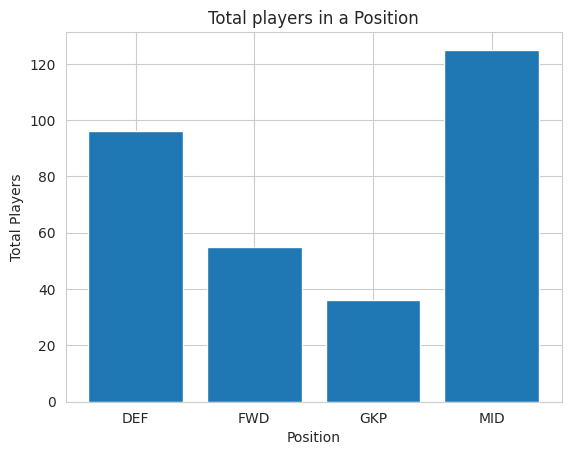

In [ ]:
# Data
position_total_players = player_data.pivot_table(index='position',values='total_points', aggfunc=lambda x: len(x.unique()))

#display(position_total_players)

# Create bar plot
plt.bar(position_total_players.index, position_total_players['total_points'])

# Set plot title and labels
plt.title('Total players in a Position')
plt.xlabel('Position')
plt.ylabel('Total Players')

# Show the plot
plt.show()

Visualizing the correlation of different positions wrt to points scored

We use histplot with kernel density function to show the distribution of points based on the position of the players

<function matplotlib.pyplot.show(close=None, block=None)>

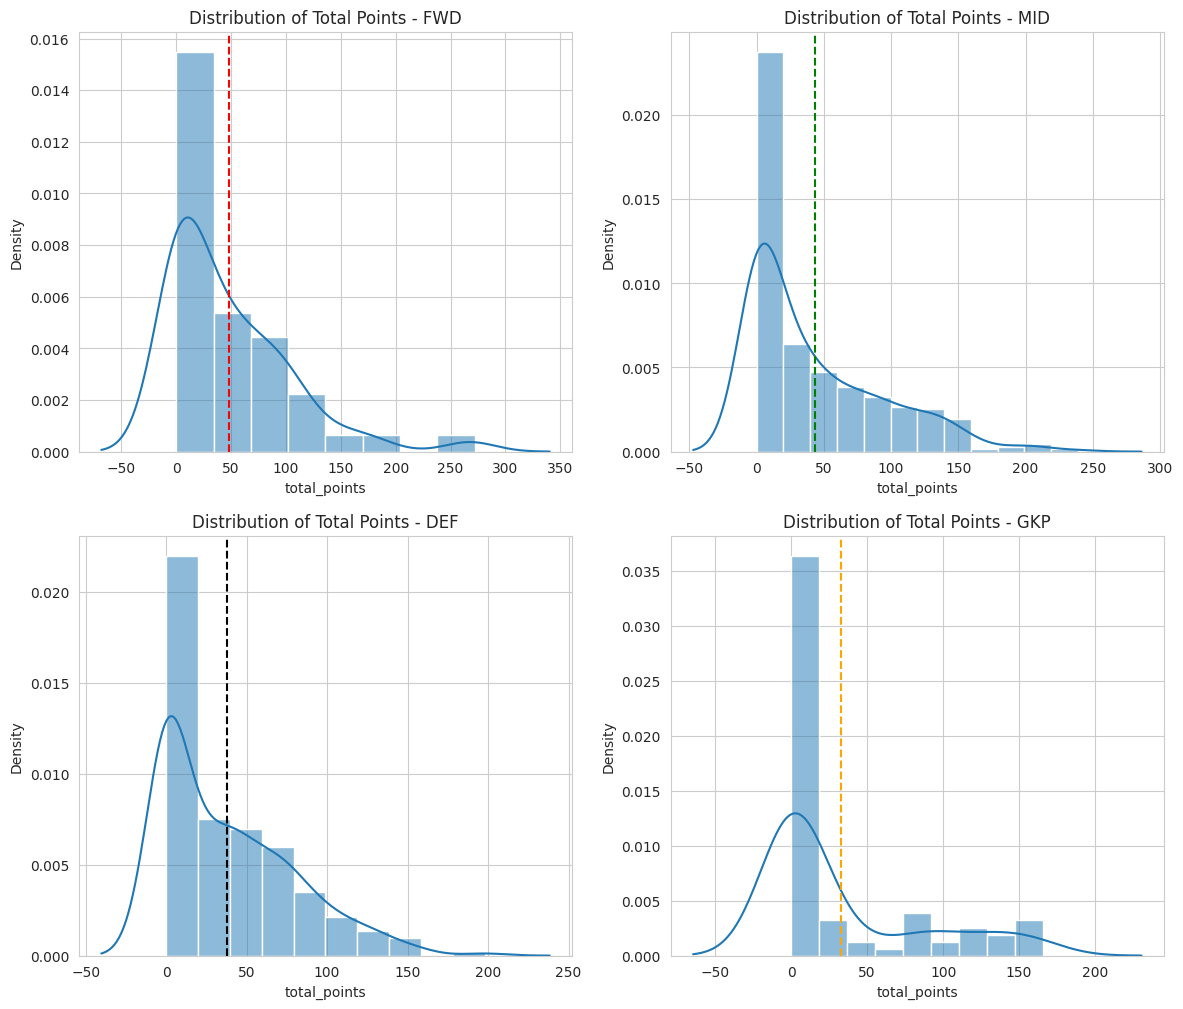

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(14,12))

#FWD
axes[0,0].set_title('Distribution of Total Points - FWD')
sns.histplot(player_data[player_data.position=='FWD'].total_points, kde=True, stat="density", kde_kws=dict(cut=3), ax=axes[0,0])
axes[0,0].axvline(np.mean(player_data[player_data.position=='FWD'].total_points), color='red', linestyle='--', label='Mean')

#MID
axes[0,1].set_title('Distribution of Total Points - MID')
sns.histplot(player_data[player_data.position=='MID'].total_points, kde=True, stat="density", kde_kws=dict(cut=3),ax=axes[0,1])
axes[0,1].axvline(np.mean(player_data[player_data.position=='MID'].total_points), color='green', linestyle='--', label='Mean')

#DEF
axes[1,0].set_title('Distribution of Total Points - DEF')
sns.histplot(player_data[player_data.position=='DEF'].total_points, kde=True, stat="density", kde_kws=dict(cut=3), ax=axes[1,0])
axes[1,0].axvline(np.mean(player_data[player_data.position=='DEF'].total_points), color='black', linestyle='--', label='Mean')

#GKP
axes[1,1].set_title('Distribution of Total Points - GKP')
sns.histplot(player_data[player_data.position=='GKP'].total_points, kde=True, stat="density", kde_kws=dict(cut=3), ax=axes[1,1])
axes[1,1].axvline(np.mean(player_data[player_data.position=='GKP'].total_points), color='orange', linestyle='--', label='Mean')

plt.show


### Imputations

In [ ]:
impute_cols = ['saves','penalties_saved', 'clean_sheets', 'goals_conceded', 'bonus', 'bps',
               'creativity', 'influence', 'threat', 'goals_scored','assists', 'minutes', 'own_goals',
               'yellow_cards', 'red_cards','penalties_missed','points_per_game', 'total_points']
positions = set(player_data.position)
player_costs = set(player_data.now_cost)
medians = {}; stds = {}

for i in positions:
    medians['{}'.format(i)] = {}
    stds['{}'.format(i)] = {}
    for c in player_costs:
        medians['{}'.format(i)]['{}'.format(c)] = {}
        stds['{}'.format(i)]['{}'.format(c)] = {}
        for j in impute_cols:
            if player_data[(player_data.total_points!=0)&(player_data.minutes!=0)&(player_data.position==str(i))&(player_data.now_cost==c)].shape[0] > 0:
                median = np.median(player_data[(player_data.total_points!=0)&(player_data.minutes!=0)&(player_data.position==i)&(player_data.now_cost==c)][j].astype(np.float32))
                std = np.std(player_data[(player_data.total_points!=0)&(player_data.minutes!=0)&(player_data.position==i)&(player_data.now_cost==c)][j].astype(np.float32))
                medians['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = median
                stds['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = std
            else:
                medians['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = 0
                stds['{}'.format(i)]['{}'.format(c)]['{}'.format(j)] = 0

for idx, row in player_data[(player_data.total_points==0)&(player_data.minutes==0)].iterrows():
    for col in impute_cols:
        player_data.loc[idx,col] = medians[str(row['position'])][str(row['now_cost'])][str(col)] + np.abs((np.random.randn()/1.5)*stds[str(row['position'])][str(row['now_cost'])][str(col)])

<function matplotlib.pyplot.show(close=None, block=None)>

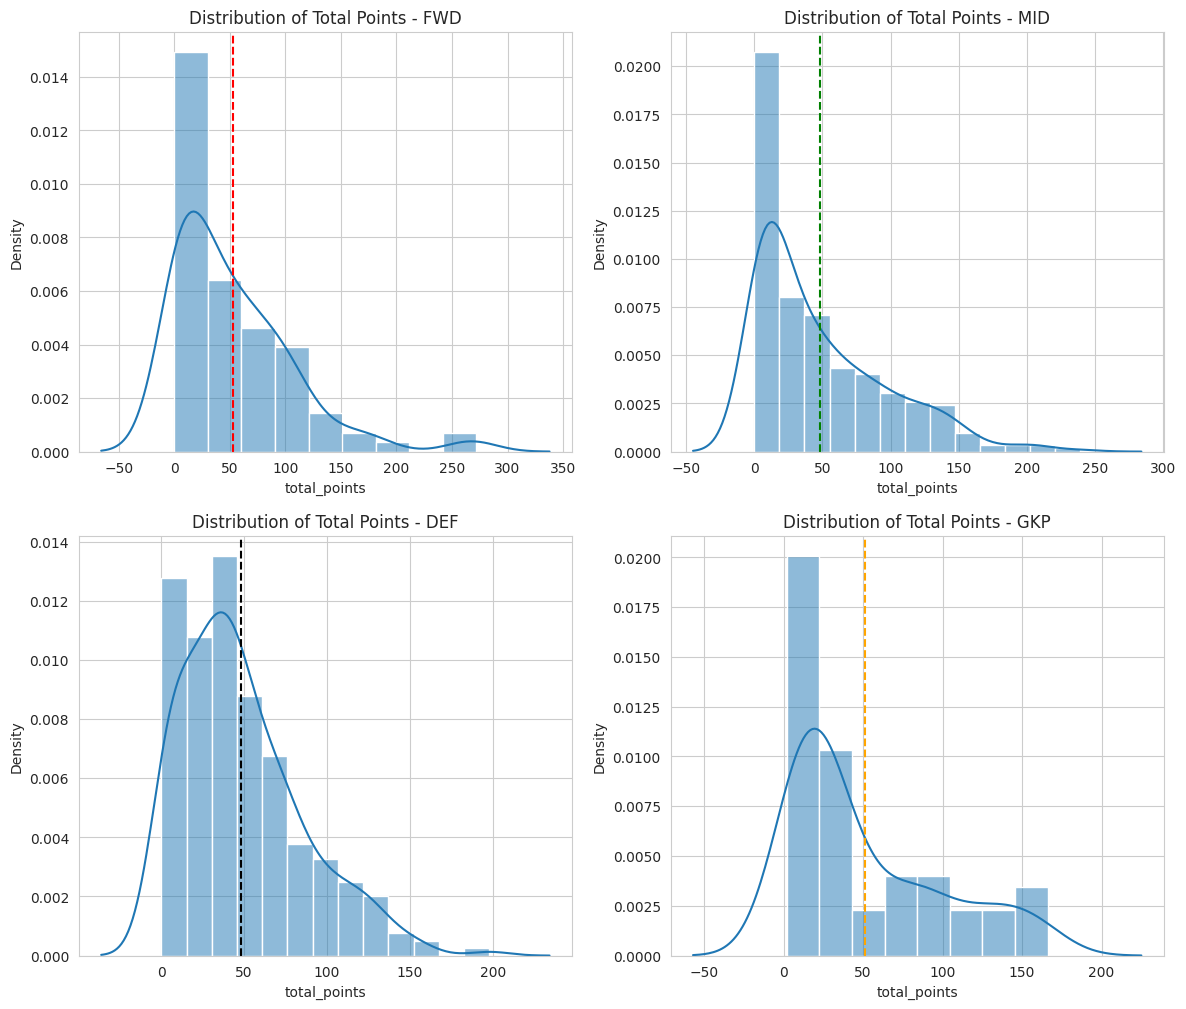

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(14,12))

#FWD
axes[0,0].set_title('Distribution of Total Points - FWD')
sns.histplot(player_data[player_data.position=='FWD'].total_points, kde=True, stat="density", kde_kws=dict(cut=3), ax=axes[0,0])
axes[0,0].axvline(np.mean(player_data[player_data.position=='FWD'].total_points), color='red', linestyle='--', label='Mean')

#MID
axes[0,1].set_title('Distribution of Total Points - MID')
sns.histplot(player_data[player_data.position=='MID'].total_points, kde=True, stat="density", kde_kws=dict(cut=3),ax=axes[0,1])
axes[0,1].axvline(np.mean(player_data[player_data.position=='MID'].total_points), color='green', linestyle='--', label='Mean')

#DEF
axes[1,0].set_title('Distribution of Total Points - DEF')
sns.histplot(player_data[player_data.position=='DEF'].total_points, kde=True, stat="density", kde_kws=dict(cut=3), ax=axes[1,0])
axes[1,0].axvline(np.mean(player_data[player_data.position=='DEF'].total_points), color='black', linestyle='--', label='Mean')

#GKP
axes[1,1].set_title('Distribution of Total Points - GKP')
sns.histplot(player_data[player_data.position=='GKP'].total_points, kde=True, stat="density", kde_kws=dict(cut=3), ax=axes[1,1])
axes[1,1].axvline(np.mean(player_data[player_data.position=='GKP'].total_points), color='orange', linestyle='--', label='Mean')

plt.show

## Linear Optimization

In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pulp import *
prob = pulp.LpProblem('Fantasy_DREAM_Team', LpMaximize)

In [ ]:
#using all available players as a decision variable to maximize the optimization
decision_variables = []
for rownum, row in player_data.iterrows():
    variable = str('x' + str(rownum))
    variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
    decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))

Total number of decision_variables: 778


In [ ]:
total_points = ""
for rownum, row in player_data.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            formula = row['total_points']*player
            total_points += formula

prob += total_points
display ("Optimization function: " + str(total_points))

'Optimization function: 153.0*x0 + 6.0*x1 + 202.0*x10 + 33.0*x100 + 94.0*x101 + 51.18560933621174*x102 + 21.783678493596852*x103 + 93.0*x104 + 69.0*x105 + 10.651444816872555*x106 + x107 + 11.06092868025366*x108 + 10.488958578276055*x109 + 32.0*x11 + 10.578593259978664*x110 + 11.978071826432473*x111 + 49.0*x112 + 3.138589630597652*x113 + 18.0*x114 + 28.0*x115 + 7.0*x116 + 14.0*x117 + 26.429646506654613*x118 + 25.93451917437313*x119 + 143.0*x12 + 29.0*x120 + 71.0*x121 + 182.0*x122 + 166.0*x123 + 5.0*x124 + 81.0*x125 + 29.0*x126 + 112.0*x127 + 85.0*x128 + 15.0*x129 + 146.0*x13 + 132.0*x130 + 111.0*x131 + 48.0*x132 + 4.0*x133 + 112.0*x134 + 38.0*x135 + 29.0*x136 + 150.0*x137 + 44.726241865174316*x138 + 7.43457493764813*x139 + 112.37944796736514*x14 + 6.420574195957218*x140 + 11.099960238935989*x141 + 7.997636741357617*x142 + 63.0*x143 + 14.0*x144 + 7.039268990151983*x145 + 143.0*x146 + 18.63349456632891*x147 + 4.0*x148 + 33.0*x149 + 198.0*x15 + 45.0*x150 + 3.8650320662981694*x151 + 24.4607

In [ ]:
import textwrap

wrapper = textwrap.TextWrapper(width=150,
    initial_indent=" " * 4,
    subsequent_indent=" " * 4,
    break_long_words=False,
    break_on_hyphens=False)
print ("Optimization function: " + wrapper.fill(str(total_points)))

Optimization function:     153.0*x0 + 6.0*x1 + 202.0*x10 + 33.0*x100 + 94.0*x101 + 51.18560933621174*x102 + 21.783678493596852*x103 + 93.0*x104 + 69.0*x105 +
    10.651444816872555*x106 + x107 + 11.06092868025366*x108 + 10.488958578276055*x109 + 32.0*x11 + 10.578593259978664*x110 + 11.978071826432473*x111 +
    49.0*x112 + 3.138589630597652*x113 + 18.0*x114 + 28.0*x115 + 7.0*x116 + 14.0*x117 + 26.429646506654613*x118 + 25.93451917437313*x119 + 143.0*x12 +
    29.0*x120 + 71.0*x121 + 182.0*x122 + 166.0*x123 + 5.0*x124 + 81.0*x125 + 29.0*x126 + 112.0*x127 + 85.0*x128 + 15.0*x129 + 146.0*x13 + 132.0*x130 +
    111.0*x131 + 48.0*x132 + 4.0*x133 + 112.0*x134 + 38.0*x135 + 29.0*x136 + 150.0*x137 + 44.726241865174316*x138 + 7.43457493764813*x139 +
    112.37944796736514*x14 + 6.420574195957218*x140 + 11.099960238935989*x141 + 7.997636741357617*x142 + 63.0*x143 + 14.0*x144 +
    7.039268990151983*x145 + 143.0*x146 + 18.63349456632891*x147 + 4.0*x148 + 33.0*x149 + 198.0*x15 + 45.0*x150 + 3.8650

Cash Constraint - 100 million pounds equivalent to 1000 in code

In [ ]:
avail_cash = 1000
total_paid = ""
for rownum, row in player_data.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            formula = row['now_cost']*player
            total_paid += formula

prob += (total_paid <= avail_cash)
print(total_paid)

48*x0 + 41*x1 + 80*x10 + 49*x100 + 47*x101 + 44*x102 + 40*x103 + 45*x104 + 44*x105 + 45*x106 + 40*x107 + 40*x108 + 45*x109 + 42*x11 + 44*x110 + 45*x111 + 50*x112 + 45*x113 + 50*x114 + 45*x115 + 45*x116 + 45*x117 + 40*x118 + 40*x119 + 48*x12 + 42*x120 + 53*x121 + 71*x122 + 48*x123 + 50*x124 + 41*x125 + 45*x126 + 44*x127 + 55*x128 + 48*x129 + 52*x13 + 48*x130 + 53*x131 + 43*x132 + 45*x133 + 44*x134 + 48*x135 + 45*x136 + 57*x137 + 39*x138 + 45*x139 + 45*x14 + 40*x140 + 45*x141 + 40*x142 + 49*x143 + 52*x144 + 43*x145 + 48*x146 + 40*x147 + 45*x148 + 50*x149 + 65*x15 + 39*x150 + 44*x151 + 39*x152 + 40*x153 + 45*x154 + 49*x155 + 45*x156 + 48*x157 + 40*x158 + 65*x159 + 45*x16 + 54*x160 + 48*x161 + 52*x162 + 45*x163 + 46*x164 + 44*x165 + 42*x166 + 44*x167 + 56*x168 + 44*x169 + 45*x17 + 53*x170 + 45*x171 + 50*x172 + 45*x173 + 40*x174 + 50*x175 + 57*x176 + 46*x177 + 45*x178 + 42*x179 + 47*x18 + 40*x180 + 40*x181 + 40*x182 + 44*x183 + 50*x184 + 46*x185 + 40*x186 + 45*x187 + 40*x188 + 45*x189 + 38*

GK constraints

In [ ]:
avail_gk = 2
total_gk = ""
for rownum, row in player_data.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['position'] == 'GKP':
                formula = 1*player
                total_gk += formula
prob += (total_gk == avail_gk)
print(total_gk)

x103 + x104 + x108 + x12 + x123 + x142 + x145 + x152 + x158 + x165 + x180 + x19 + x193 + x203 + x217 + x227 + x238 + x241 + x263 + x264 + x268 + x273 + x279 + x285 + x30 + x311 + x317 + x320 + x329 + x335 + x358 + x361 + x367 + x37 + x386 + x388 + x41 + x411 + x413 + x427 + x443 + x451 + x460 + x468 + x479 + x482 + x494 + x496 + x506 + x508 + x528 + x537 + x539 + x549 + x550 + x571 + x576 + x579 + x587 + x603 + x609 + x622 + x625 + x628 + x632 + x651 + x652 + x654 + x67 + x671 + x672 + x697 + x70 + x711 + x727 + x73 + x737 + x738 + x74 + x743 + x756 + x760 + x776 + x93 + x98


DEF constraints

In [ ]:
avail_def = 5
total_def = ""
for rownum, row in player_data.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['position'] == 'DEF':
                formula = 1*player
                total_def += formula
prob += (total_def == avail_def)
print((total_def))

x102 + x105 + x107 + x11 + x115 + x116 + x118 + x119 + x120 + x124 + x126 + x127 + x13 + x132 + x133 + x134 + x138 + x14 + x140 + x143 + x146 + x147 + x150 + x153 + x16 + x161 + x163 + x164 + x166 + x174 + x181 + x182 + x183 + x184 + x186 + x188 + x192 + x195 + x197 + x198 + x199 + x2 + x200 + x208 + x209 + x21 + x211 + x213 + x216 + x220 + x221 + x223 + x230 + x232 + x239 + x242 + x245 + x246 + x253 + x255 + x258 + x26 + x262 + x267 + x272 + x277 + x281 + x283 + x29 + x291 + x295 + x296 + x297 + x298 + x299 + x300 + x301 + x302 + x303 + x309 + x312 + x316 + x319 + x321 + x323 + x328 + x33 + x330 + x331 + x337 + x339 + x34 + x345 + x347 + x351 + x354 + x359 + x362 + x363 + x366 + x369 + x370 + x371 + x38 + x380 + x381 + x383 + x385 + x389 + x39 + x391 + x393 + x395 + x397 + x398 + x402 + x404 + x406 + x410 + x414 + x418 + x419 + x425 + x431 + x434 + x435 + x438 + x44 + x442 + x446 + x447 + x448 + x45 + x452 + x454 + x459 + x461 + x462 + x463 + x464 + x465 + x472 + x475 + x478 + x480 + 

MID constraints

In [ ]:
avail_mid = 5
total_mid = ""
for rownum, row in player_data.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['position'] == 'MID':
                formula = 1*player
                total_mid += formula
prob += (total_mid == avail_mid)
print((total_mid))

x0 + x1 + x10 + x100 + x101 + x110 + x112 + x117 + x121 + x125 + x128 + x129 + x130 + x131 + x135 + x136 + x141 + x144 + x149 + x15 + x151 + x154 + x155 + x156 + x157 + x160 + x162 + x167 + x168 + x169 + x17 + x170 + x171 + x172 + x173 + x176 + x178 + x179 + x18 + x187 + x189 + x190 + x191 + x194 + x196 + x20 + x201 + x202 + x204 + x205 + x206 + x210 + x212 + x214 + x218 + x22 + x222 + x224 + x225 + x228 + x229 + x234 + x235 + x236 + x237 + x24 + x240 + x243 + x247 + x248 + x249 + x25 + x250 + x251 + x252 + x257 + x259 + x260 + x261 + x266 + x269 + x27 + x270 + x274 + x275 + x276 + x28 + x282 + x284 + x286 + x287 + x288 + x289 + x290 + x292 + x293 + x3 + x304 + x305 + x306 + x307 + x308 + x31 + x310 + x314 + x318 + x322 + x324 + x325 + x326 + x327 + x333 + x334 + x336 + x338 + x342 + x343 + x344 + x346 + x348 + x349 + x35 + x352 + x355 + x356 + x357 + x36 + x360 + x364 + x365 + x372 + x373 + x374 + x376 + x377 + x378 + x379 + x382 + x387 + x390 + x392 + x394 + x396 + x399 + x4 + x40 + 

FWD constraints

In [ ]:
avail_fwd = 3
total_fwd = ""
for rownum, row in player_data.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['position'] == 'FWD':
                formula = 1*player
                total_fwd += formula
prob += (total_fwd == avail_fwd)
print(total_fwd)

x106 + x109 + x111 + x113 + x114 + x122 + x137 + x139 + x148 + x159 + x175 + x177 + x185 + x207 + x215 + x219 + x226 + x23 + x231 + x233 + x244 + x254 + x256 + x265 + x271 + x278 + x280 + x294 + x313 + x315 + x32 + x332 + x340 + x341 + x350 + x353 + x368 + x375 + x384 + x403 + x412 + x417 + x428 + x429 + x430 + x432 + x441 + x450 + x458 + x46 + x489 + x490 + x493 + x507 + x526 + x540 + x542 + x551 + x556 + x57 + x575 + x582 + x585 + x59 + x596 + x599 + x602 + x617 + x621 + x638 + x641 + x656 + x662 + x667 + x669 + x673 + x693 + x699 + x700 + x71 + x710 + x714 + x729 + x736 + x741 + x752 + x767 + x768 + x770 + x773 + x8 + x83 + x87


Team constraints - only upto 3 players allowed from each PL team

using a hash function to store all the teams and players within the team so that only a maximum value of upto 3 is chosen

In [ ]:
team_dict= {}
for team in set(player_data.team_code):
    team_dict[str(team)]=dict()
    team_dict[str(team)]['avail'] = 3
    team_dict[str(team)]['total'] = ""
    for rownum, row in player_data.iterrows():
        for i, player in enumerate(decision_variables):
            if rownum == i:
                if row['team_code'] == team:
                    formula = 1*player
                    team_dict[str(team)]['total'] += formula

    prob += (team_dict[str(team)]['total'] <= team_dict[str(team)]['avail'])
print(len(team_dict))

20


Solving the Linear Problem

In [ ]:
prob.writeLP('Fantasy_DREAM_Team.lp')
optimization_result = prob.solve()
assert optimization_result == LpStatusOptimal
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
	print(v.name, "=", v.varValue)

Status: Optimal
Optimal Solution to the problem:  2759.0
Individual decision_variables: 
x0 = 0.0
x1 = 0.0
x10 = 1.0
x100 = 0.0
x101 = 0.0
x102 = 0.0
x103 = 0.0
x104 = 0.0
x105 = 0.0
x106 = 0.0
x107 = 0.0
x108 = 0.0
x109 = 0.0
x11 = 0.0
x110 = 0.0
x111 = 0.0
x112 = 0.0
x113 = 0.0
x114 = 0.0
x115 = 0.0
x116 = 0.0
x117 = 0.0
x118 = 0.0
x119 = 0.0
x12 = 0.0
x120 = 0.0
x121 = 0.0
x122 = 1.0
x123 = 1.0
x124 = 0.0
x125 = 0.0
x126 = 0.0
x127 = 0.0
x128 = 0.0
x129 = 0.0
x13 = 0.0
x130 = 0.0
x131 = 0.0
x132 = 0.0
x133 = 0.0
x134 = 0.0
x135 = 0.0
x136 = 0.0
x137 = 0.0
x138 = 0.0
x139 = 0.0
x14 = 0.0
x140 = 0.0
x141 = 0.0
x142 = 0.0
x143 = 0.0
x144 = 0.0
x145 = 0.0
x146 = 1.0
x147 = 0.0
x148 = 0.0
x149 = 0.0
x15 = 1.0
x150 = 0.0
x151 = 0.0
x152 = 0.0
x153 = 0.0
x154 = 0.0
x155 = 0.0
x156 = 0.0
x157 = 0.0
x158 = 0.0
x159 = 0.0
x16 = 0.0
x160 = 1.0
x161 = 0.0
x162 = 0.0
x163 = 0.0
x164 = 0.0
x165 = 0.0
x166 = 0.0
x167 = 0.0
x168 = 0.0
x169 = 0.0
x17 = 0.0
x170 = 0.0
x171 = 0.0
x172 = 0.0
x173 = 0.0

In [ ]:
variable_name = []
variable_value = []

for v in prob.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
    value = re.findall(r'(\d+)', row['variable'])
    df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_index()

#append results
for rownum, row in player_data.iterrows():
    for results_rownum, results_row in df.iterrows():
        if rownum == results_row['variable']:
            player_data.loc[rownum, 'decision'] = results_row['value']

player_data[player_data.decision==1].now_cost.sum()
player_data[player_data.decision==1].total_points.sum()
player_data[player_data.decision==1].sort_values('element_type').head(15)

,full_name,first_name,second_name,element_type,position,id,team,team_code,web_name,saves,penalties_saved,clean_sheets,goals_conceded,bonus,bps,creativity,ep_next,influence,threat,ict_index,ict_index_rank_type,goals_scored,assists,minutes,own_goals,yellow_cards,red_cards,penalties_missed,selected_by_percent,now_cost,points_per_game,total_points,decision
123,David Raya Martin,David,Raya Martin,1,GKP,81,Brentford,94,Raya,154.0,0.0,12.0,46.0,20.0,822.0,20.1,3.0,1146.0,4.0,117.3,1,0.0,0.0,3420.0,1.0,1.0,0.0,0.0,14.4,48,4.4,166.0,1.0
508,David De Gea Quintana,David,De Gea Quintana,1,GKP,327,Man Utd,1,De Gea,101.0,1.0,17.0,43.0,5.0,729.0,13.0,4.7,828.0,0.0,84.3,7,0.0,0.0,3420.0,0.0,0.0,0.0,0.0,15.8,51,4.2,161.0,1.0
45,Tyrone Mings,Tyrone,Mings,2,DEF,39,Aston Villa,7,Mings,0.0,0.0,12.0,40.0,17.0,617.0,88.2,1.5,664.4,121.0,87.8,39,1.0,3.0,3150.0,1.0,7.0,0.0,0.0,12.5,47,3.7,130.0,1.0
146,Ben Mee,Ben,Mee,2,DEF,526,Brentford,94,Mee,0.0,0.0,12.0,40.0,11.0,643.0,103.1,3.2,780.6,336.0,122.2,14,3.0,2.0,3269.0,0.0,2.0,0.0,0.0,14.4,48,3.9,143.0,1.0
552,Kieran Trippier,Kieran,Trippier,2,DEF,357,Newcastle,4,Trippier,0.0,0.0,16.0,31.0,39.0,941.0,1824.0,5.1,908.2,123.0,285.8,1,1.0,9.0,3342.0,1.0,5.0,0.0,0.0,62.4,60,5.2,198.0,1.0
553,Dan Burn,Dan,Burn,2,DEF,358,Newcastle,4,Burn,0.0,0.0,14.0,30.0,6.0,584.0,230.4,4.3,555.0,265.0,105.3,22,1.0,0.0,3109.0,0.0,5.0,0.0,0.0,4.3,45,3.4,129.0,1.0
561,Fabian Schär,Fabian,Schär,2,DEF,366,Newcastle,4,Schär,0.0,0.0,15.0,28.0,6.0,617.0,264.7,2.1,680.8,523.0,147.1,7,1.0,3.0,3207.0,1.0,7.0,0.0,0.0,14.4,51,3.9,139.0,1.0
4,Martin Ødegaard,Martin,Ødegaard,3,MID,7,Arsenal,3,Ødegaard,0.0,0.0,13.0,38.0,30.0,813.0,1140.3,7.7,971.8,934.0,304.9,4,15.0,8.0,3132.0,0.0,4.0,0.0,0.0,33.3,69,5.7,212.0,1.0
10,Bukayo Saka,Bukayo,Saka,3,MID,13,Arsenal,3,Saka,0.0,0.0,12.0,42.0,19.0,678.0,1106.1,2.0,1014.2,1214.0,333.4,3,14.0,12.0,3183.0,0.0,6.0,0.0,1.0,25.6,80,5.3,202.0,1.0
15,Gabriel Martinelli Silva,Gabriel,Martinelli Silva,3,MID,19,Arsenal,3,Martinelli,0.0,0.0,14.0,33.0,18.0,648.0,838.1,0.0,844.2,1300.0,298.1,5,15.0,9.0,2789.0,0.0,3.0,0.0,0.0,26.3,65,5.5,198.0,1.0


In [ ]:
optimized_dream_team = player_data[player_data.decision==1].sort_values('element_type').head(15)

column_sum = optimized_dream_team['total_points'].sum()

print(column_sum)

print(player_data[player_data.decision==1].total_points.sum())

2759.0
2759.0
